## Multiple Linear Regression

In [221]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [222]:
# Read csv
file_path = '../data/final/wo_na.csv'
df = pd.read_csv(file_path)
df.set_index('Date', inplace=True)
df.index = pd.to_datetime(df.index)

In [223]:
# Define x and y variables
X = df[['Iron Ore (CFR, $/t)', 'HCC (Aus FOB, $/t)',
         'Domestic Scrap (DDP Jiangsu incl. VAT $/t)',
         'Monthly Export of Semis & Finished Steel as % of Production',
         'FAI in urban real estate development (y-o-y) Growth',
         'Automobile Production (y-o-y)', 'Civil Metal-Vessels/Steel Ships (y-o-y)',
         'Household Fridges (y-o-y)', 'Air Conditioner (y-o-y)']]
y = df['HRC (FOB, $/t)']

In [224]:
# Log transform x variables
def log_trans(df):
    negative_cols = df.columns[df.min() < 0]

    df_transformed = df.copy()
    for col in negative_cols:
        constant = abs(df[col].min()) + 1
        df_transformed[col] = np.log(df[col] + constant)

    for col in df.columns.difference(negative_cols):
        df_transformed[col] = np.log(df[col])
    
    return df_transformed

X_transformed = log_trans(X)

In [225]:
# Split into training and testing sets with a ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

In [226]:
# Scale x variables since they are of different magnitudes
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Linear Regression
$$ y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_n X_n + \epsilon $$

In [227]:
# Model fitting
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [228]:
# Obtain regression model coefficients
print('Intercept: ', model.intercept_)
list(zip(X, model.coef_))

Intercept:  560.9310344827583


[('Iron Ore (CFR, $/t)', -3.495024567329609),
 ('HCC (Aus FOB, $/t)', 52.36734969628685),
 ('Domestic Scrap (DDP Jiangsu incl. VAT $/t)', 92.09708532372225),
 ('Monthly Export of Semis & Finished Steel as % of Production',
  35.731997100871574),
 ('FAI in urban real estate development (y-o-y) Growth', 32.65393155655787),
 ('Automobile Production (y-o-y)', 21.875852578540744),
 ('Civil Metal-Vessels/Steel Ships (y-o-y)', 9.429254591955212),
 ('Household Fridges (y-o-y)', -9.679185173895817),
 ('Air Conditioner (y-o-y)', -27.64161584690205)]

In [229]:
# Model predictions
y_pred = model.predict(X_test_scaled)

In [230]:
# Error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error: ', mae)
print('Mean Squared Error: ', mse)
print('Root Mean Squared Error: ', rmse)
print('R-squared: ', r2)

Mean Absolute Error:  48.287406627447645
Mean Squared Error:  6547.371652547058
Root Mean Squared Error:  80.91583066710159
R-squared:  0.7206875007625606


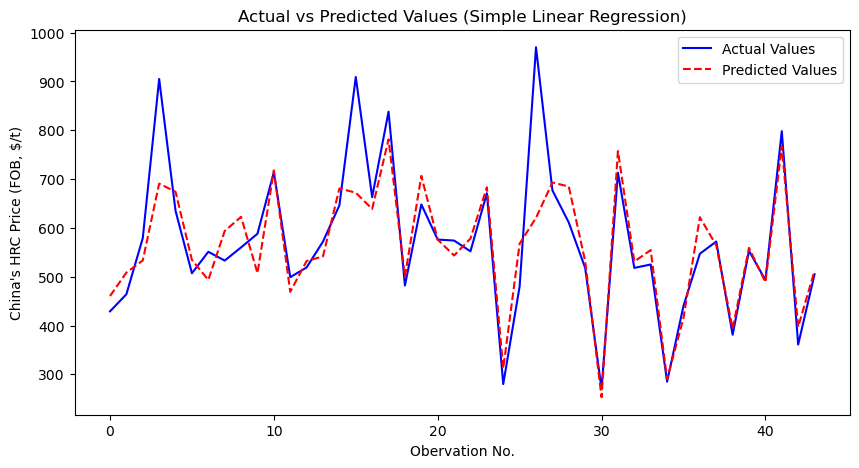

In [231]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(y_test)), y_test, label="Actual Values", color="blue")
plt.plot(np.arange(len(y_pred)), y_pred, label="Predicted Values", color="red", linestyle="dashed")

plt.xlabel("Obervation No.")
plt.ylabel("China's HRC Price (FOB, $/t)")
plt.title("Actual vs Predicted Values (Simple Linear Regression)")
plt.legend()
plt.show()

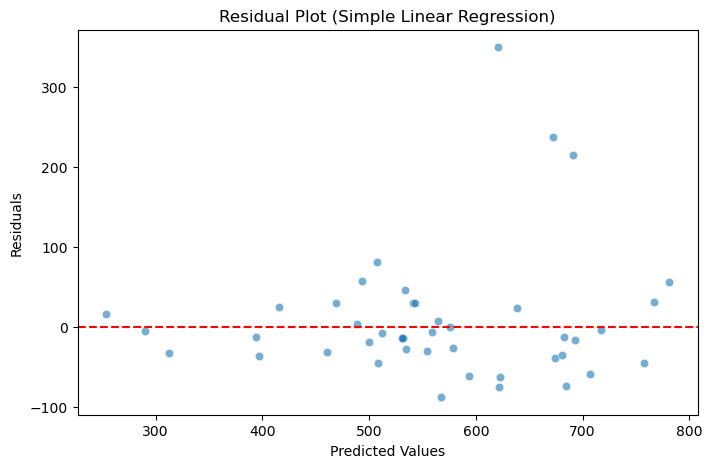

In [232]:
residuals = y_test - y_pred  # Compute residuals

# Plot residuals vs. predicted values
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)  # Scatter plot
plt.axhline(y=0, color="red", linestyle="--")  # Horizontal line at zero
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Simple Linear Regression)")
plt.show()

### Input VAR forecasted x variables into Regression model

In [233]:
# Read csv
file_path = '../data/final/var_forecast.csv'
var_forecast_df = pd.read_csv(file_path)
var_forecast_df.set_index('Date', inplace=True)
var_forecast_df.head()

,"HRC (FOB, $/t)_1d","Iron Ore (CFR, $/t)_1d","HCC (Aus FOB, $/t)_1d",Domestic Scrap (DDP Jiangsu incl. VAT $/t)_1d,Monthly Export of Semis & Finished Steel as % of Production_1d,FAI in urban real estate development (y-o-y) Growth_1d,Automobile Production (y-o-y)_1d,Civil Metal-Vessels/Steel Ships (y-o-y)_1d,Household Fridges (y-o-y)_1d,Air Conditioner (y-o-y)_1d,"HRC (FOB, $/t)_forecast","Iron Ore (CFR, $/t)_forecast","HCC (Aus FOB, $/t)_forecast",Domestic Scrap (DDP Jiangsu incl. VAT $/t)_forecast,Monthly Export of Semis & Finished Steel as % of Production_forecast,FAI in urban real estate development (y-o-y) Growth_forecast,Automobile Production (y-o-y)_forecast,Civil Metal-Vessels/Steel Ships (y-o-y)_forecast,Household Fridges (y-o-y)_forecast,Air Conditioner (y-o-y)_forecast
Date,,,,,,,,,,,,,,,,,,,,
2024-11-01,15.715296,6.099946,2.971304,7.006252,0.250739,-0.068023,-0.905197,-0.836485,-0.166616,-0.689199,533.322322,104.461386,232.442921,402.923488,7.681345,-14.469970,-3.299769,-5.647595,5.421792,6.602450
2024-12-01,11.997200,1.633983,6.690259,1.827389,-0.188093,0.012015,0.955910,0.117517,-0.302735,0.489227,545.319522,106.095368,239.133180,404.750877,7.493252,-14.457955,-2.343860,-5.530078,5.119057,7.091677
2025-01-01,5.257965,1.924460,2.038433,1.435680,0.060266,-0.098758,0.171080,0.878248,-0.761128,-0.971385,550.577486,108.019829,241.171613,406.186557,7.553518,-14.556713,-2.172779,-4.651830,4.357930,6.120292
2025-02-01,1.212697,0.216504,3.249279,-4.762764,0.369704,-0.041140,-1.008147,-0.880374,-0.181342,-0.027186,551.790183,108.236333,244.420892,401.423793,7.923223,-14.597853,-3.180926,-5.532204,4.176588,6.093106
2025-03-01,-2.708218,-1.545835,-0.429143,-3.507602,-0.023040,-0.126006,-0.846587,-0.649913,-0.270594,0.379147,549.081965,106.690497,243.991749,397.916191,7.900183,-14.723859,-4.027513,-6.182117,3.905993,6.472253


In [234]:
# Obtain forecasted x variables
forecasted_X = var_forecast_df[['Iron Ore (CFR, $/t)_forecast', 'HCC (Aus FOB, $/t)_forecast',
         'Domestic Scrap (DDP Jiangsu incl. VAT $/t)_forecast',
         'Monthly Export of Semis & Finished Steel as % of Production_forecast',
         'FAI in urban real estate development (y-o-y) Growth_forecast',
         'Automobile Production (y-o-y)_forecast', 'Civil Metal-Vessels/Steel Ships (y-o-y)_forecast',
         'Household Fridges (y-o-y)_forecast', 'Air Conditioner (y-o-y)_forecast']].copy()
forecasted_X.rename(columns={'Iron Ore (CFR, $/t)_forecast':'Iron Ore (CFR, $/t)', 'HCC (Aus FOB, $/t)_forecast':'HCC (Aus FOB, $/t)',
         'Domestic Scrap (DDP Jiangsu incl. VAT $/t)_forecast':'Domestic Scrap (DDP Jiangsu incl. VAT $/t)',
         'Monthly Export of Semis & Finished Steel as % of Production_forecast':'Monthly Export of Semis & Finished Steel as % of Production',
         'FAI in urban real estate development (y-o-y) Growth_forecast':'FAI in urban real estate development (y-o-y) Growth',
         'Automobile Production (y-o-y)_forecast':'Automobile Production (y-o-y)', 'Civil Metal-Vessels/Steel Ships (y-o-y)_forecast':'Civil Metal-Vessels/Steel Ships (y-o-y)',
         'Household Fridges (y-o-y)_forecast':'Household Fridges (y-o-y)', 'Air Conditioner (y-o-y)_forecast':'Air Conditioner (y-o-y)'}, inplace=True)

In [235]:
# Scale x variables
forecasted_X_transformed = log_trans(forecasted_X)
forecasted_X_scaled = scaler.transform(forecasted_X_transformed)

In [236]:
# Obtain y forecast
y_forecast = model.predict(forecasted_X_scaled)

fc_period = pd.date_range(start='11/1/2024', end='3/1/2026', freq='MS')
df_forecast = pd.DataFrame(y_forecast, index=fc_period, columns=['HRC (FOB, $/t)_f'])
df_forecast.index.name = 'Date'
df_forecast

,"HRC (FOB, $/t)_f"
Date,
2024-11-01,470.754576
2024-12-01,487.244364
2025-01-01,506.528922
2025-02-01,488.641676
2025-03-01,456.712881
2025-04-01,470.805399
2025-05-01,470.274494
2025-06-01,461.629705
2025-07-01,454.656506


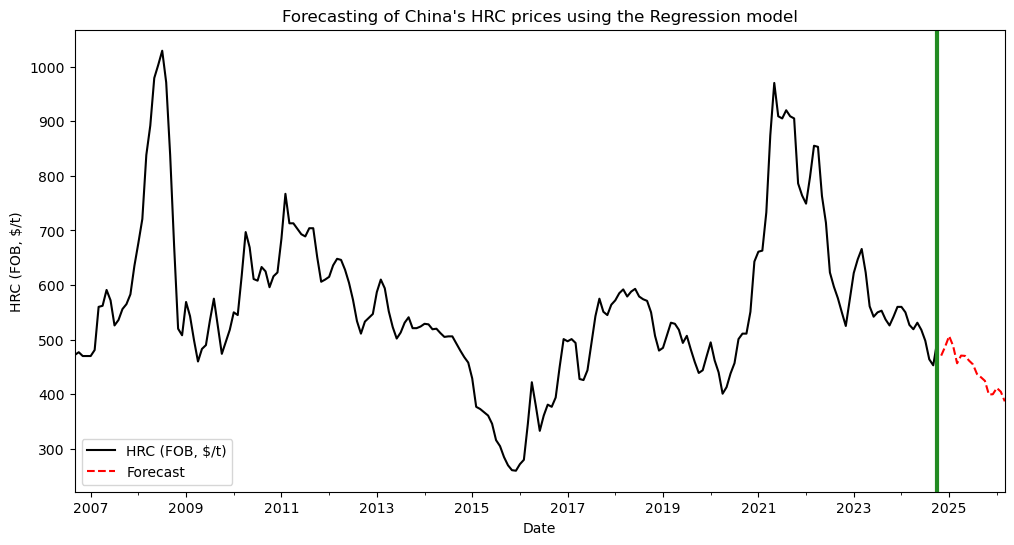

In [237]:
# Plot forecast
fig, ax = plt.subplots(figsize=(12, 6))

df['HRC (FOB, $/t)'].plot(color='k')
df_forecast['HRC (FOB, $/t)_f'].plot(color='r', linestyle ='dashed', label='Forecast')

plt.title("Forecasting of China's HRC prices using the Regression model")
plt.ylabel("HRC (FOB, $/t)")
plt.xlabel("Date")
plt.axvline(x = '2024-10-20', linewidth = 3, color = 'forestgreen', linestyle = 'solid')
ax.legend()

### Report forecast data

In [238]:
# downside forecast
data_downside = {
    'Date': ['2024-11-01', '2024-12-01', '2025-01-01', '2025-02-01', '2025-03-01', '2025-04-01', '2025-05-01', '2025-06-01', '2025-07-01', '2025-08-01', '2025-09-01', '2025-10-01', '2025-11-01', '2025-12-01',
             '2026-01-01', '2026-02-01', '2026-03-01'],
    'Iron Ore (CFR, $/t)_forecast': [85, 85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85],
    'HCC (Aus FOB, $/t)_forecast': [180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180],
    'Domestic Scrap (DDP Jiangsu incl. VAT $/t)_forecast': [350,350,350,350,350,350,350,350,350,350,350,350,350,350,350,350,350],
    'Monthly Export of Semis & Finished Steel as % of Production_forecast': [12, 12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12],
    'FAI in urban real estate development (y-o-y) Growth_forecast': [1, 1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
}
downside_df = pd.DataFrame(data_downside)
downside_df['Date'] = pd.to_datetime(downside_df['Date'])
downside_df.set_index('Date', inplace=True)

# upside forecast
data_upside = {
    'Date': ['2024-11-01', '2024-12-01', '2025-01-01', '2025-02-01', '2025-03-01', '2025-04-01', '2025-05-01', '2025-06-01', '2025-07-01', '2025-08-01', '2025-09-01', '2025-10-01', '2025-11-01', '2025-12-01',
             '2026-01-01', '2026-02-01', '2026-03-01'],
    'Iron Ore (CFR, $/t)_forecast': [100, 100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100],
    'HCC (Aus FOB, $/t)_forecast': [220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220],
    'Domestic Scrap (DDP Jiangsu incl. VAT $/t)_forecast': [400,400,400,400,400,400,400,400,400,400,400,400,400,400,400,400,400],
    'Monthly Export of Semis & Finished Steel as % of Production_forecast': [9, 9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9],
    'FAI in urban real estate development (y-o-y) Growth_forecast': [5, 5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5]
}
upside_df = pd.DataFrame(data_upside)
upside_df['Date'] = pd.to_datetime(upside_df['Date'])
upside_df.set_index('Date', inplace=True)

In [239]:
# Combine downside/upside with VAR forecasted x variables
# downside data
forecasted_X_downside = var_forecast_df[['Iron Ore (CFR, $/t)_forecast', 'HCC (Aus FOB, $/t)_forecast',
         'Domestic Scrap (DDP Jiangsu incl. VAT $/t)_forecast',
         'Monthly Export of Semis & Finished Steel as % of Production_forecast',
         'FAI in urban real estate development (y-o-y) Growth_forecast',
         'Automobile Production (y-o-y)_forecast', 'Civil Metal-Vessels/Steel Ships (y-o-y)_forecast',
         'Household Fridges (y-o-y)_forecast', 'Air Conditioner (y-o-y)_forecast']].copy()

forecasted_X_downside['Iron Ore (CFR, $/t)_forecast'] = downside_df['Iron Ore (CFR, $/t)_forecast']
forecasted_X_downside['HCC (Aus FOB, $/t)_forecast'] = downside_df['HCC (Aus FOB, $/t)_forecast']
forecasted_X_downside['Domestic Scrap (DDP Jiangsu incl. VAT $/t)_forecast'] = downside_df['Domestic Scrap (DDP Jiangsu incl. VAT $/t)_forecast']
forecasted_X_downside['Monthly Export of Semis & Finished Steel as % of Production_forecast'] = downside_df['Monthly Export of Semis & Finished Steel as % of Production_forecast']
forecasted_X_downside['FAI in urban real estate development (y-o-y) Growth_forecast'] = downside_df['FAI in urban real estate development (y-o-y) Growth_forecast']

forecasted_X_downside.rename(columns={'Iron Ore (CFR, $/t)_forecast':'Iron Ore (CFR, $/t)', 'HCC (Aus FOB, $/t)_forecast':'HCC (Aus FOB, $/t)',
         'Domestic Scrap (DDP Jiangsu incl. VAT $/t)_forecast':'Domestic Scrap (DDP Jiangsu incl. VAT $/t)',
         'Monthly Export of Semis & Finished Steel as % of Production_forecast':'Monthly Export of Semis & Finished Steel as % of Production',
         'FAI in urban real estate development (y-o-y) Growth_forecast':'FAI in urban real estate development (y-o-y) Growth',
         'Automobile Production (y-o-y)_forecast':'Automobile Production (y-o-y)', 'Civil Metal-Vessels/Steel Ships (y-o-y)_forecast':'Civil Metal-Vessels/Steel Ships (y-o-y)',
         'Household Fridges (y-o-y)_forecast':'Household Fridges (y-o-y)', 'Air Conditioner (y-o-y)_forecast':'Air Conditioner (y-o-y)'}, inplace=True)

# upside data
forecasted_X_upside = var_forecast_df[['Iron Ore (CFR, $/t)_forecast', 'HCC (Aus FOB, $/t)_forecast',
         'Domestic Scrap (DDP Jiangsu incl. VAT $/t)_forecast',
         'Monthly Export of Semis & Finished Steel as % of Production_forecast',
         'FAI in urban real estate development (y-o-y) Growth_forecast',
         'Automobile Production (y-o-y)_forecast', 'Civil Metal-Vessels/Steel Ships (y-o-y)_forecast',
         'Household Fridges (y-o-y)_forecast', 'Air Conditioner (y-o-y)_forecast']].copy()

forecasted_X_upside['Iron Ore (CFR, $/t)_forecast'] = upside_df['Iron Ore (CFR, $/t)_forecast']
forecasted_X_upside['HCC (Aus FOB, $/t)_forecast'] = upside_df['HCC (Aus FOB, $/t)_forecast']
forecasted_X_upside['Domestic Scrap (DDP Jiangsu incl. VAT $/t)_forecast'] = upside_df['Domestic Scrap (DDP Jiangsu incl. VAT $/t)_forecast']
forecasted_X_upside['Monthly Export of Semis & Finished Steel as % of Production_forecast'] = upside_df['Monthly Export of Semis & Finished Steel as % of Production_forecast']
forecasted_X_upside['FAI in urban real estate development (y-o-y) Growth_forecast'] = upside_df['FAI in urban real estate development (y-o-y) Growth_forecast']

forecasted_X_upside.rename(columns={'Iron Ore (CFR, $/t)_forecast':'Iron Ore (CFR, $/t)', 'HCC (Aus FOB, $/t)_forecast':'HCC (Aus FOB, $/t)',
         'Domestic Scrap (DDP Jiangsu incl. VAT $/t)_forecast':'Domestic Scrap (DDP Jiangsu incl. VAT $/t)',
         'Monthly Export of Semis & Finished Steel as % of Production_forecast':'Monthly Export of Semis & Finished Steel as % of Production',
         'FAI in urban real estate development (y-o-y) Growth_forecast':'FAI in urban real estate development (y-o-y) Growth',
         'Automobile Production (y-o-y)_forecast':'Automobile Production (y-o-y)', 'Civil Metal-Vessels/Steel Ships (y-o-y)_forecast':'Civil Metal-Vessels/Steel Ships (y-o-y)',
         'Household Fridges (y-o-y)_forecast':'Household Fridges (y-o-y)', 'Air Conditioner (y-o-y)_forecast':'Air Conditioner (y-o-y)'}, inplace=True)

In [240]:
# Scale & transform x variables for downside
forecasted_X_downside_transformed = log_trans(forecasted_X_downside)
forecasted_X_downside_scaled = scaler.transform(forecasted_X_downside_transformed)

# Scale & transform x variables for upside
forecasted_X_upside_transformed = log_trans(forecasted_X_upside)
forecasted_X_upside_scaled = scaler.transform(forecasted_X_upside_transformed)

In [241]:
# Obtain y forecast for downside
y_forecast_downside = model.predict(forecasted_X_downside_scaled)

fc_period = pd.date_range(start='11/1/2024', end='3/1/2026', freq='MS')
df_forecast_downside = pd.DataFrame(y_forecast_downside, index=fc_period, columns=['HRC (FOB, $/t)_downside'])
df_forecast_downside.index.name = 'Date'

# Obtain y forecast for upside
y_forecast_upside = model.predict(forecasted_X_upside_scaled)

df_forecast_upside = pd.DataFrame(y_forecast_upside, index=fc_period, columns=['HRC (FOB, $/t)_upside'])
df_forecast_upside.index.name = 'Date'

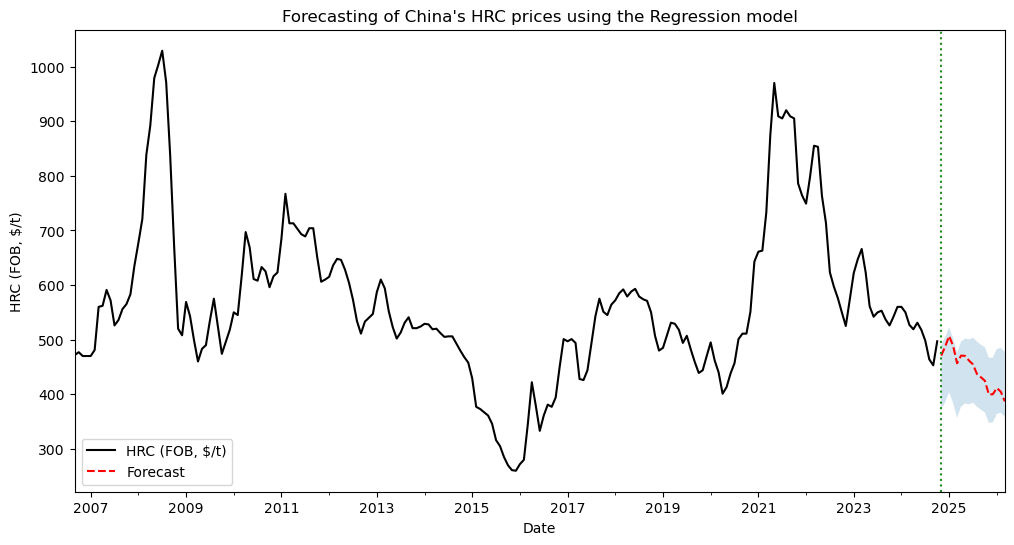

In [244]:
# Plot forecast
fig, ax = plt.subplots(figsize=(12, 6))

df['HRC (FOB, $/t)'].plot(color='k')
#df_forecast_downside['HRC (FOB, $/t)_downside'].plot(color='r', linestyle ='dashed', label='Downside forecast')
#df_forecast_upside['HRC (FOB, $/t)_upside'].plot(color='r', linestyle ='dashed', label='Upside forecast')
df_forecast['HRC (FOB, $/t)_f'].plot(color='r', linestyle ='dashed', label='Forecast')
ax.fill_between(x=fc_period, y1=df_forecast_downside['HRC (FOB, $/t)_downside'], y2=df_forecast_upside['HRC (FOB, $/t)_upside'], alpha=0.2)

plt.title("Forecasting of China's HRC prices using the Regression model")
plt.ylabel("HRC (FOB, $/t)")
plt.xlabel("Date")
plt.axvline(x = '2024-11-01', color = 'forestgreen', linestyle = 'dotted')
ax.legend()

## Polynomial Linear Regression (degree = 2)
$$ y = \beta_0 + \sum_{i=1}^{n} \beta_i X_i + \sum_{i=1}^{n} \beta_{ii} X_i^2 + \sum_{i=1}^{n} \sum_{j=i+1}^{n} \beta_{ij} X_i X_j + \epsilon $$

where:  
- $X_i$ are the original factors affecting China's HRC price.  
- $X_i^2$ are the squared terms capturing nonlinear relationships.  
- $X_i$, $X_j$ are interaction terms, representing how two factors together impact China's HRC price.  

**Reasons for introducing polynomial features** 
* The relationship between the factors and HRC price is nonlinear as shown in the simple regression.  
* The residual plot above shows curved patterns in linear regression . 
* The interactions between the factors may be significant.  
* High-degree polynomial regression can overfit the data.

In [96]:
# Define polynomial transformation
degree = 2
poly = PolynomialFeatures(degree)

# Transform BOTH training and testing data
X_train_poly = poly.fit_transform(X_train)  # Fit and transform for training
X_test_poly = poly.transform(X_test)        # Only transform for testing

# Train the model using transformed training data
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict using the transformed test data
y_pred_poly = model.predict(X_test_poly)

In [97]:
# Get feature names and coefficients
feature_names = poly.get_feature_names_out(input_features=X.columns)
coefficients = model.coef_

# Display results
pd.DataFrame({"Feature": feature_names, "Coefficient": coefficients})

,Feature,Coefficient
0,1,-1.855028e+10
1,"Iron Ore (CFR, $/t)",-9.812107e-01
2,"HCC (Aus FOB, $/t)",1.141720e+00
3,Domestic Scrap (DDP Jiangsu incl. VAT $/t),-2.130382e+00
4,Monthly Export of Semis & Finished Steel as % ...,-5.436475e+01
5,FAI in urban real estate development (y-o-y) G...,8.074980e+00
6,Automobile Production (y-o-y),7.953422e-01
7,Civil Metal-Vessels/Steel Ships (y-o-y),-4.876764e+00
8,Household Fridges (y-o-y),3.614280e+00
9,Air Conditioner (y-o-y),9.408942e+00


In [98]:
# Error metrics
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
r2_poly = r2_score(y_test, y_pred_poly)

print('Mean Absolute Error: ', mae_poly)
print('Mean Squared Error: ', mse_poly)
print('Root Mean Squared Error: ', rmse_poly)
print('R-squared: ', r2_poly)

Mean Absolute Error:  35.39163797551935
Mean Squared Error:  2045.3643790718495
Root Mean Squared Error:  45.225704848811915
R-squared:  0.9127442480911334


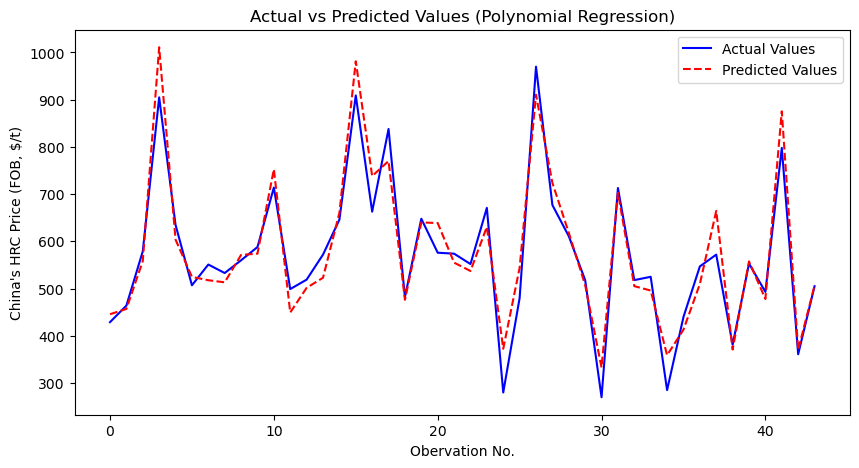

In [99]:
# Assuming y_test and y_pred are 1D arrays
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(y_test)), y_test, label="Actual Values", color="blue")
plt.plot(np.arange(len(y_pred_poly)), y_pred_poly, label="Predicted Values", color="red", linestyle="dashed")

plt.xlabel("Obervation No.")
plt.ylabel("China's HRC Price (FOB, $/t)")
plt.title("Actual vs Predicted Values (Polynomial Regression)")
plt.legend()
plt.show()

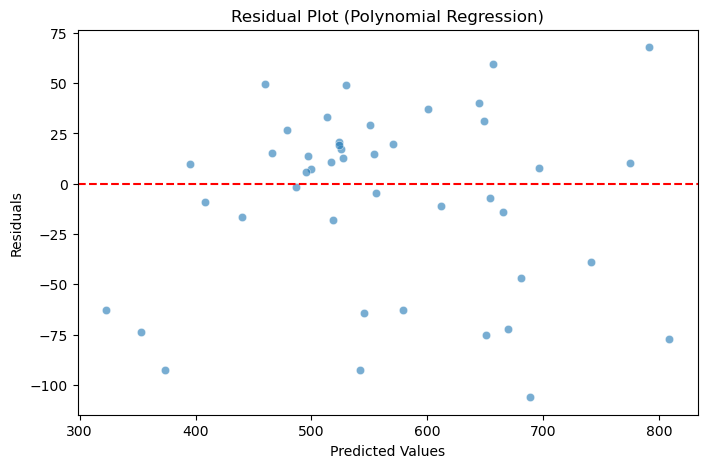

In [100]:
residuals_poly = y_test - y_pred_poly  # Compute residuals

# Plot residuals vs. predicted values
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred, y=residuals_poly, alpha=0.6)  # Scatter plot
plt.axhline(y=0, color="red", linestyle="--")  # Horizontal line at zero
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Polynomial Regression)")
plt.show()

### Input VAR forecasted x variables into Regression model

In [101]:
# Read csv
file_path = '../data/final/var_forecast.csv'
var_forecast_df = pd.read_csv(file_path)
var_forecast_df.set_index('Date', inplace=True)

In [102]:
# Obtain forecasted x variables
forecasted_X = var_forecast_df[['Iron Ore (CFR, $/t)_forecast', 'HCC (Aus FOB, $/t)_forecast',
         'Domestic Scrap (DDP Jiangsu incl. VAT $/t)_forecast',
         'Monthly Export of Semis & Finished Steel as % of Production_forecast',
         'FAI in urban real estate development (y-o-y) Growth_forecast',
         'Automobile Production (y-o-y)_forecast', 'Civil Metal-Vessels/Steel Ships (y-o-y)_forecast',
         'Household Fridges (y-o-y)_forecast', 'Air Conditioner (y-o-y)_forecast']]

forecasted_X.rename(columns={'Iron Ore (CFR, $/t)_forecast':'Iron Ore (CFR, $/t)', 'HCC (Aus FOB, $/t)_forecast':'HCC (Aus FOB, $/t)',
         'Domestic Scrap (DDP Jiangsu incl. VAT $/t)_forecast':'Domestic Scrap (DDP Jiangsu incl. VAT $/t)',
         'Monthly Export of Semis & Finished Steel as % of Production_forecast':'Monthly Export of Semis & Finished Steel as % of Production',
         'FAI in urban real estate development (y-o-y) Growth_forecast':'FAI in urban real estate development (y-o-y) Growth',
         'Automobile Production (y-o-y)_forecast':'Automobile Production (y-o-y)', 'Civil Metal-Vessels/Steel Ships (y-o-y)_forecast':'Civil Metal-Vessels/Steel Ships (y-o-y)',
         'Household Fridges (y-o-y)_forecast':'Household Fridges (y-o-y)', 'Air Conditioner (y-o-y)_forecast':'Air Conditioner (y-o-y)'}, inplace=True)

/var/folders/kk/49b6qgnj201cbhch83b6xr740000gn/T/ipykernel_18425/165176089.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasted_X.rename(columns={'Iron Ore (CFR, $/t)_forecast':'Iron Ore (CFR, $/t)', 'HCC (Aus FOB, $/t)_forecast':'HCC (Aus FOB, $/t)',


In [103]:
# Scale and transform x variables
forecasted_X_poly = poly.transform(forecasted_X)

In [104]:
# Obtain y forecast
y_forecast = model.predict(forecasted_X_poly)

fc_period = pd.date_range(start='11/1/2024', end='3/1/2026', freq='MS')
df_forecast = pd.DataFrame(y_forecast, index=fc_period, columns=['HRC (FOB, $/t)_f'])
df_forecast.index.name = 'Date'
df_forecast

,"HRC (FOB, $/t)_f"
Date,
2024-11-01,538.702339
2024-12-01,543.053211
2025-01-01,543.578148
2025-02-01,526.249172
2025-03-01,515.901760
2025-04-01,515.862972
2025-05-01,518.677963
2025-06-01,519.614506
2025-07-01,525.254417


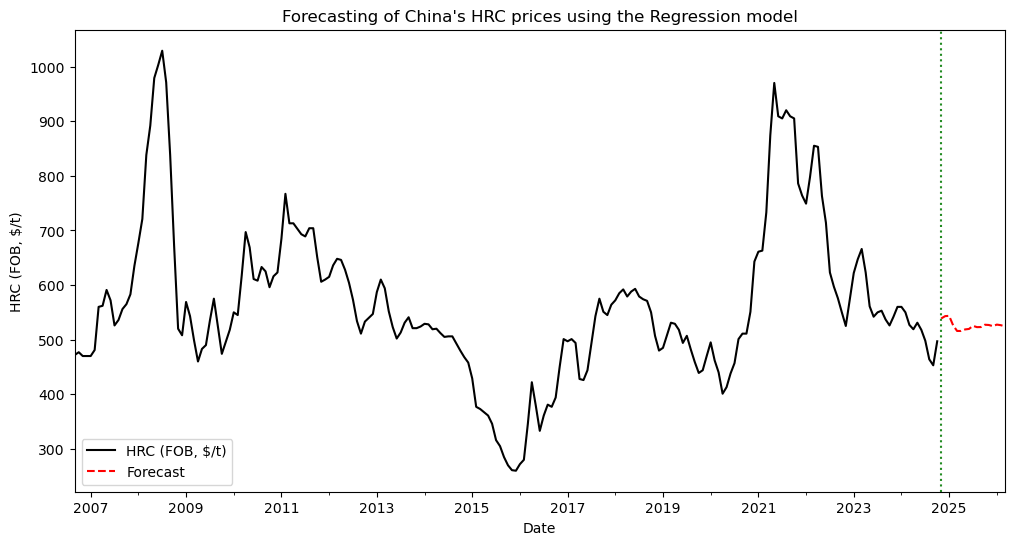

In [105]:
# Plot forecast
fig, ax = plt.subplots(figsize=(12, 6))

df['HRC (FOB, $/t)'].plot(color='k')
df_forecast['HRC (FOB, $/t)_f'].plot(color='r', linestyle ='dashed', label='Forecast')

plt.title("Forecasting of China's HRC prices using the Regression model")
plt.ylabel("HRC (FOB, $/t)")
plt.xlabel("Date")
plt.axvline(x = '2024-11-01', color = 'forestgreen', linestyle = 'dotted')
ax.legend()